## NN from scratch

simple neural network implementation from scratch trained on the MNIST dataset, with subsequent enhancements for improved performance. From this implementation: https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/notebook, several changes were made to improve performance and accuracy.

Key Components:
MNIST Dataset:
The model is trained and tested on the MNIST dataset, consisting of grayscale images of hand-written digits (0-9). https://www.kaggle.com/competitions/digit-recognizer/data (from kaggle)

Neural Network from Scratch:
The initial implementation includes a basic neural network architecture for digit classification. Improvements:

- Hyperparameter tuning with adaptive learning rate scheduling.
- Kaiming initialization for improving weiths initialization.
- L2 regularization to prevent overfitting.
- Mini-batch gradient descent for improved efficiency.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Read the CSV file 'train.csv' into a Pandas DataFrame
data = pd.read_csv('train.csv')

C:\Users\migue\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\migue\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\migue\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### NN Workflow overview

![NN Workflow Overview](NN%20workflow%20overview.jpg)

In [2]:
data = np.array(data) # Convert the data from DataFrame to a NumPy array
m, n = data.shape # m rows; n columns
np.random.shuffle(data) # shuffle randomly before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255. # normalize

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255. # normalize

_,m_train = X_train.shape

In [3]:
# Update the init_params function to use Kaiming He initialization
def init_params():
    W1 = np.random.randn(10, 784) * np.sqrt(2 / 784)
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * np.sqrt(2 / 10)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Update the backward_prop function to include L2 regularization
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y, lambd):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * dZ2.dot(A1.T) + (lambd / m) * W2
    db2 = (1 / m) * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T) + (lambd / m) * W1
    db1 = (1 / m) * np.sum(dZ1)
    return dW1, db1, dW2, db2


# This function adjusts the learning rate during training using a schedule
def learning_rate_schedule(initial_alpha, iteration):
    return initial_alpha / (1 + 0.0001 * iteration)

# Update the update_params function to use the learning rate schedule 
# using the learning rate schedule to control the step size in the parameter update
# The learning rate (alpha) is adjusted at each iteration using the learning_rate_schedule function
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha, iteration):
    alpha = learning_rate_schedule(alpha, iteration) # Adjust the learning rate based on the schedule
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [4]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

lambd = 0.01 # Regularization parameter

# performs gradient descent optimization to train the neural network.
# It updates the weights and biases (W1, b1, W2, b2) using forward and backward propagation.
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y, lambd) # Regularization is applied to prevent overfitting using the lambda (lambd) parameter.
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha, i)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [5]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)
# Results format:
# Iteration X
# [predic1 predic2 ... predicN-1] [label1 label2 ... labelN-1]

Iteration:  0
[1 1 1 ... 3 8 3] [2 6 0 ... 5 8 8]
0.08536585365853659
Iteration:  10
[2 6 0 ... 3 3 3] [2 6 0 ... 5 8 8]
0.2975609756097561
Iteration:  20
[2 6 0 ... 3 3 3] [2 6 0 ... 5 8 8]
0.47621951219512193
Iteration:  30
[2 6 0 ... 3 8 3] [2 6 0 ... 5 8 8]
0.5692682926829268
Iteration:  40
[2 6 0 ... 3 8 1] [2 6 0 ... 5 8 8]
0.6144390243902439
Iteration:  50
[2 6 0 ... 3 8 1] [2 6 0 ... 5 8 8]
0.6405121951219512
Iteration:  60
[2 6 0 ... 5 8 1] [2 6 0 ... 5 8 8]
0.6634634146341464
Iteration:  70
[2 6 0 ... 5 8 1] [2 6 0 ... 5 8 8]
0.7212439024390244
Iteration:  80
[2 6 0 ... 5 8 1] [2 6 0 ... 5 8 8]
0.7858780487804878
Iteration:  90
[2 6 0 ... 5 8 1] [2 6 0 ... 5 8 8]
0.8133414634146341
Iteration:  100
[2 6 0 ... 5 8 1] [2 6 0 ... 5 8 8]
0.8261463414634146
Iteration:  110
[2 6 0 ... 5 8 1] [2 6 0 ... 5 8 8]
0.8345609756097561
Iteration:  120
[2 6 0 ... 5 8 1] [2 6 0 ... 5 8 8]
0.8422439024390244
Iteration:  130
[2 6 0 ... 5 8 1] [2 6 0 ... 5 8 8]
0.8489512195121951
Iteration:  140

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    """
    Make predictions on input data.

    Parameters:
    - X: Input data (features)
    - W1, b1, W2, b2: Parameters of the neural network

    Returns:
    - predictions: Predicted labels
    """
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    # Extract the current image and its label
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    
    # Print the prediction and true label
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    # Display the current image
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


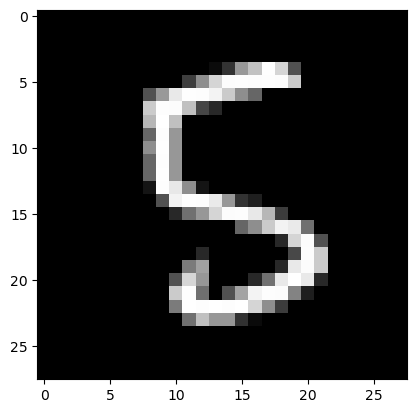

Prediction:  [7]
Label:  7


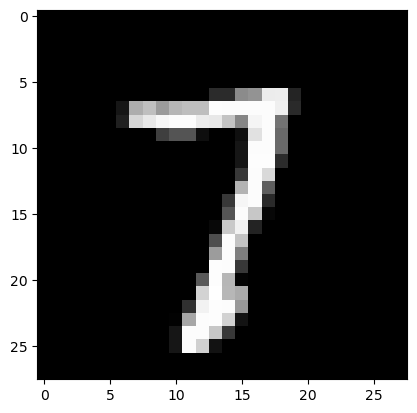

Prediction:  [1]
Label:  1


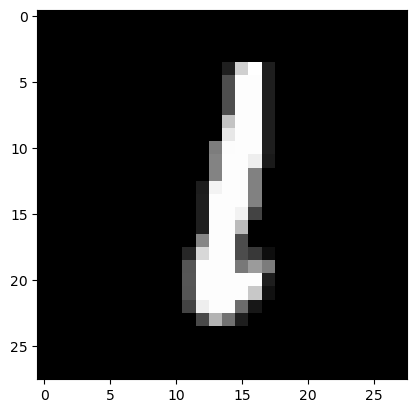

Prediction:  [4]
Label:  4


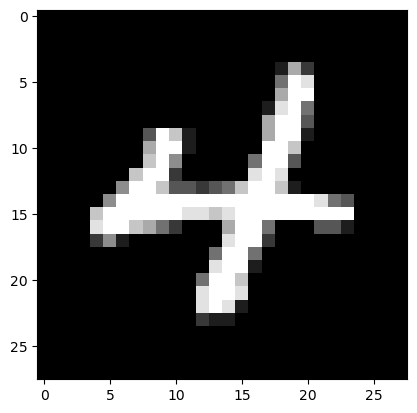

In [8]:
test_prediction(3, W1, b1, W2, b2)
test_prediction(67, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(100, W1, b1, W2, b2)